### Aplicando novos conceitos e outras formas de fazer classificação. Para esse notebook usaremos um dataset disponibilizado na kaggle para verificar se um twet tem conteudo racista ou misógino.

In [20]:
import pandas as pd
import re

# para criarmos a rede neural
from keras import models
from keras import layers

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import TfidfVectorizer

# mapear ints em arrays
from keras.utils.np_utils import to_categorical

from matplotlib import pyplot as plt

In [21]:
data  = pd.read_csv("train.csv")

data.head(20)

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
5,6,0,[2/2] huge fan fare and big talking before the...
6,7,0,@user camping tomorrow @user @user @user @use...
7,8,0,the next school year is the year for exams.ð...
8,9,0,we won!!! love the land!!! #allin #cavs #champ...
9,10,0,@user @user welcome here ! i'm it's so #gr...


In [22]:
data.groupby('label').count()

,id,tweet
label,,
0,29720,29720
1,2242,2242


### Vamos normalizar nosso texto para remover menções.

In [23]:
def normalize(text):
    text = re.sub("@\w+","",text)
    text = re.sub("#","",text)
    text = text.lower()
    return text

data['tweet'] = data['tweet'].apply(normalize)

### Para mapear vamos usar tfidf vectorizer.

In [24]:
xtrain, ytest, xright, yright = train_test_split(data['tweet'],data['label'],random_state=4)

In [25]:
tfidf = TfidfVectorizer()

xtrain_matrix = tfidf.fit_transform(xtrain)
ytest_matrix = tfidf.transform(ytest)

In [26]:
xright_matrix = to_categorical(xright)
yright_matrix = to_categorical(yright)

print(xright.head())

print(xright_matrix[0:5])

12739    0
11256    0
23059    0
16126    0
23220    0
Name: label, dtype: int64
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]


### Vamos treinar um modelo de aprendizagem profunda para tentar predizer nossos twets.

In [27]:
INPUT = xtrain_matrix.shape[1]
EPOCHS = 20
BATCH_SIZE = 512

In [28]:
model = models.Sequential()
model.add(layers.Dense(20,activation="relu",input_shape=(INPUT,)))
model.add(layers.Dense(20,activation="relu"))
model.add(layers.Dense(2,activation="softmax"))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 20)                691820    
_________________________________________________________________
dense_5 (Dense)              (None, 20)                420       
_________________________________________________________________
dense_6 (Dense)              (None, 2)                 42        
Total params: 692,282
Trainable params: 692,282
Non-trainable params: 0
_________________________________________________________________


### Treinamos nosso modelo

In [29]:
model.compile(optimizer="rmsprop", loss='categorical_crossentropy', metrics=['accuracy'])

In [30]:
history = model.fit(xtrain_matrix,xright_matrix,epochs=EPOCHS,batch_size=BATCH_SIZE,validation_data=(ytest_matrix,yright_matrix))
history

Train on 23971 samples, validate on 7991 samples
Epoch 1/20
23971/23971 [==============================] - 8s 313us/step - loss: 0.5139 - acc: 0.9187 - val_loss: 0.3449 - val_acc: 0.9304
Epoch 2/20
23971/23971 [==============================] - 7s 284us/step - loss: 0.2651 - acc: 0.9301 - val_loss: 0.2018 - val_acc: 0.9351
Epoch 3/20
23971/23971 [==============================] - 7s 294us/step - loss: 0.1713 - acc: 0.9376 - val_loss: 0.1509 - val_acc: 0.9422
Epoch 4/20
23971/23971 [==============================] - 7s 298us/step - loss: 0.1152 - acc: 0.9545 - val_loss: 0.1207 - val_acc: 0.9544
Epoch 5/20
23971/23971 [==============================] - 7s 297us/step - loss: 0.0797 - acc: 0.9718 - val_loss: 0.1126 - val_acc: 0.9600
Epoch 6/20
23971/23971 [==============================] - 7s 292us/step - loss: 0.0595 - acc: 0.9795 - val_loss: 0.1126 - val_acc: 0.9613
Epoch 7/20
23971/23971 [==============================] - 7s 286us/step - loss: 0.0464 - acc: 0.9845 - val_loss: 0.1168 - v

In [31]:
history.history

{'val_loss': [0.344924001162796,
  0.20175339421041766,
  0.15088810726670177,
  0.12066834814825071,
  0.11255352237304837,
  0.11261112107649984,
  0.1167511314604939,
  0.12312736377416512,
  0.13060672039115045,
  0.13864778023072827,
  0.1460660129241033,
  0.1569367530102456,
  0.1716528539868085,
  0.17193079547647272,
  0.17731745050108905,
  0.18493433781140678,
  0.19343686090394652,
  0.1966534455977786,
  0.20578848731978755,
  0.20974398632697597],
 'val_acc': [0.9304217237612286,
  0.9350519327463368,
  0.9421849572498917,
  0.9544487559680511,
  0.9599549503622388,
  0.9613314990540228,
  0.960455513495764,
  0.9614566397628145,
  0.961706921329577,
  0.9597046688700659,
  0.9598298095788576,
  0.9615817806207855,
  0.962457763859304,
  0.9615817805461958,
  0.9578275571193463,
  0.9582029794694903,
  0.9617069214041668,
  0.9607057951371163,
  0.9620823437543107,
  0.9608309336753471],
 'loss': [0.5139199596815764,
  0.2650975371515103,
  0.17131330578329468,
  0.115227

In [32]:
def eval_metric(history, metric_name,epochs):
    metric = history.history[metric_name]
    val_metric = history.history['val_' + metric_name]

    e = range(1, epochs + 1)

    plt.plot(e, metric, 'bo', label='Train ' + metric_name)
    plt.plot(e, val_metric, 'b', label='Validation ' + metric_name)
    plt.legend()
    plt.show()

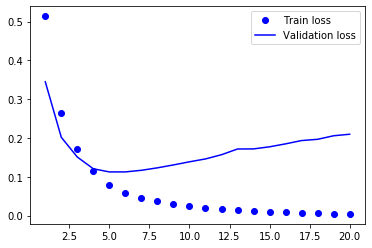

In [33]:
eval_metric(history,"loss",EPOCHS)

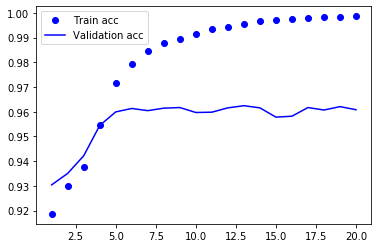

In [34]:
eval_metric(history,"acc",EPOCHS)

In [35]:
output = model.predict(ytest_matrix)

output

array([[1.0000000e+00, 6.7640014e-09],
       [9.9601138e-01, 3.9886697e-03],
       [1.0000000e+00, 6.9729125e-09],
       ...,
       [1.0000000e+00, 3.0358452e-13],
       [9.9947399e-01, 5.2599580e-04],
       [9.9981922e-01, 1.8076212e-04]], dtype=float32)

In [36]:
output = [ 1 if k[0] < 5 else 0 for k in output]

In [37]:
print(output)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [38]:
0 in output

False